In [130]:
from transformers import pipeline, set_seed

RuntimeError: Failed to import transformers.pipelines because of the following error (look up to see its traceback):
module 'torch._subclasses' has no attribute 'functional_tensor'

In [73]:
import torch
import torch.nn.functional as F
 
x = torch.Tensor([-2, -1, 0, 1, 2])
output = F.relu(x)
 
print(output)

tensor([0., 0., 0., 1., 2.])


In [74]:
import torch
import torch.nn.functional as F
 
x = torch.Tensor([-2, -1, 0, 1, 2])
output = F.sigmoid(x)
 
print(output)

tensor([0.1192, 0.2689, 0.5000, 0.7311, 0.8808])


In [75]:
import torch
from torch.autograd import Variable

tensor = torch.FloatTensor([[1,2],[3,4]])
variable = Variable(tensor,requires_grad = True)
#True是反向传播过程当中去

print(tensor)
print(variable)

t_out = torch.mean(tensor*tensor)
v_out = torch.mean(variable*variable)

print(t_out)
print(v_out)

v_out.backward()
print(variable.grad)
print(variable)
print(variable.data)
print(variable.data.numpy())

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor(7.5000)
tensor(7.5000, grad_fn=<MeanBackward0>)
tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])
tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor([[1., 2.],
        [3., 4.]])
[[1. 2.]
 [3. 4.]]


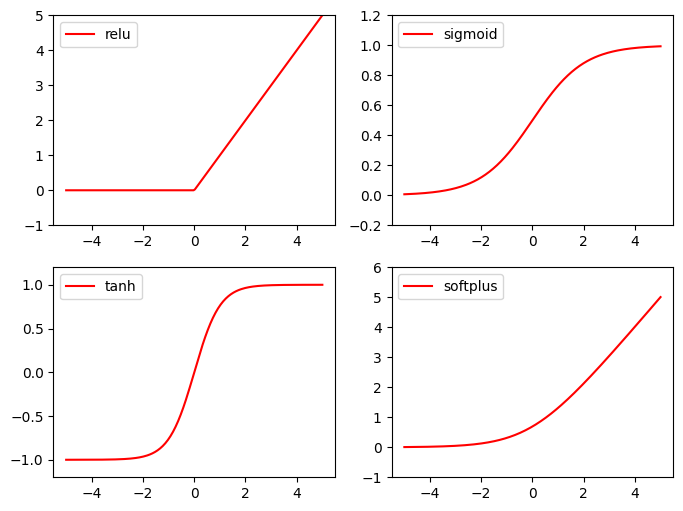

In [76]:
import torch.nn.functional as F 
import matplotlib.pyplot as plt

x = torch.linspace(-5,5,200)
x = Variable(x)
#print(x)
x_np = x.data.numpy()

y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

plt.figure(1,figsize=(8,6))
plt.subplot(221)
plt.plot(x_np,y_relu,c='red',label='relu')
plt.ylim((-1,5))
plt.legend(loc='best')

plt.figure(1,figsize=(8,6))
plt.subplot(222)
plt.plot(x_np,y_sigmoid,c='red',label='sigmoid')
plt.ylim((-0.2,1.2))
plt.legend(loc='best')

plt.figure(1,figsize=(8,6))
plt.subplot(223)
plt.plot(x_np,y_tanh,c='red',label='tanh')
plt.ylim((-1.2,1.2))
plt.legend(loc='best')

plt.figure(1,figsize=(8,6))
plt.subplot(224)
plt.plot(x_np,y_softplus,c='red',label='softplus')
plt.ylim((-1,6))
plt.legend(loc='best')





In [77]:
import torch
import numpy as np

numpynums = np.arange(6).reshape(2,3)
tensor = torch.from_numpy(numpynums)
tensor2numpy = tensor.numpy()

print(numpynums)
print(tensor)
print(tensor2numpy)

[[0 1 2]
 [3 4 5]]
tensor([[0, 1, 2],
        [3, 4, 5]])
[[0 1 2]
 [3 4 5]]


In [78]:
data = [-2,-4,2,4]
tensor = torch.FloatTensor(data)

print(np.abs(data),
     torch.abs(tensor),
     np.mean(data),
     torch.mean(tensor))

[2 4 2 4] tensor([2., 4., 2., 4.]) 0.0 tensor(0.)


In [79]:
import torch
import torch.nn.functional as F #激励函数都在这
from torch.autograd import Variable

#做一些假数据来
x = torch.linspace(-5,5,200)
x = Variable(x)

x_np = x.data.numpy()

#集中常用的激励函数
y_relu = F.relu(x).data.numpy()
print(y_relu)



[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.02512559 

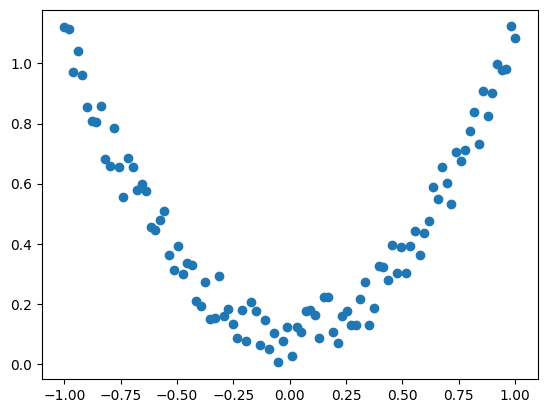

In [80]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

x1 = torch.linspace(-1,1,100)

x = torch.unsqueeze(x1,dim =1)
#print(x1)
#print(x)

y = x.pow(2) + 0.2*torch.rand(x.size())
 
plt.scatter(x.data.numpy(),y.data.numpy())


In [81]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
    
net = Net(n_feature=1,n_hidden=10,n_output=1)

print(net)
        
        
        
        
        

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [127]:
optimizer = torch.optim.SGD(net.parameters(),lr =0.2)
loss_func = torch.nn.MSELoss()

for t in range(100):
    prediction = net(x)    
    loss = loss_func(prediction,y)    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()




AttributeError: module 'torch._subclasses' has no attribute 'functional_tensor'

In [ ]:
import matplotlib.pyplot as plt
from IPython import display
import time

time_start=time.time()

x_list = []
y_list = []

def paintloss(loss,it):
    x_list.append(it)
    y_list.append(loss)
    display.clear_output(wait=True)
    plt.plot(x_list, y_list)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    #plt.pause(0.1) 

plt.ion()
plt.show()

for t in range(100):
    prediction = net(x)    
    loss = loss_func(prediction,y)    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t% 5 == 0:
        plt.cla()
        display.clear_output(wait=True)
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
        plt.text(0.5,0,'Loss=%.4f' % loss.data.numpy(),fontdict={'size':20,'color':'red'})
        plt.pause(0.1)
        #paintloss(loss.item(),t)
        
time_end=time.time()
print('time cost',time_end-time_start,'s')
print(x.size(),y.size())
print(torch.get_num_threads())



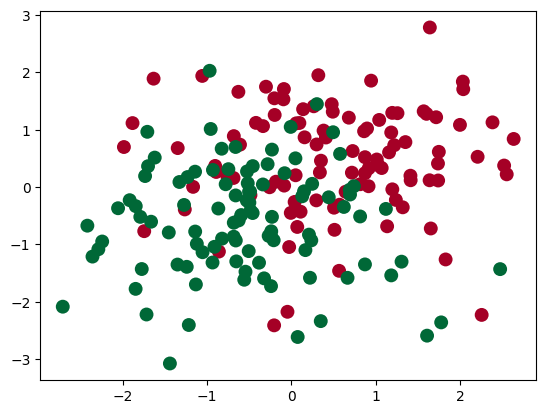

In [83]:
import torch
import matplotlib.pyplot as plt

# 假数据
n_data = torch.ones(100, 2)         # 数据的基本形态
x0 = torch.normal(0.5*n_data, 1)      # 类型0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # 类型0 y data (tensor), shape=(100, )
x1 = torch.normal(-0.5*n_data, 1)     # 类型1 x data (tensor), shape=(100, 1)
y1 = torch.ones(100)                # 类型1 y data (tensor), shape=(100, )

# 注意 x, y 数据的数据形式是一定要像下面一样 (torch.cat 是在合并数据)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # LongTensor = 64-bit integer

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
# plt.show()

# 画图
#plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()


In [84]:
import torch
import torch.nn.functional as F     # 激励函数都在这

class Net(torch.nn.Module):     # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.out = torch.nn.Linear(n_hidden, n_output)       # 输出层线性输出

    def forward(self, x):
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.out(x)                 # 输出值, 但是这个不是预测值, 预测值还需要再另外计算
        return x

net = Net(n_feature=2, n_hidden=50, n_output=2) # 几个类别就几个 output

print(net)  # net 的结构
 


Net(
  (hidden): Linear(in_features=2, out_features=50, bias=True)
  (out): Linear(in_features=50, out_features=2, bias=True)
)


In [85]:
import matplotlib.pyplot as plt
from IPython import display
import time
time_start=time.time()

# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)  # 传入 net 的所有参数, 学习率
# 算误差的时候, 注意真实值!不是! one-hot 形式的, 而是1D Tensor, (batch,)
# 但是预测值是2D tensor (batch, n_classes)
loss_func = torch.nn.CrossEntropyLoss()


plt.ion()   # 画图
 

for t in range(100):
    out = net(x)     # 喂给 net 训练数据 x, 输出分析值    
    loss = loss_func(out, y)     # 计算两者的误差    
    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上

    # 接着上面来
    if t % 2 == 0:
        plt.cla()
        display.clear_output(wait=True)
        # 过了一道 softmax 的激励函数后的最大概率才是预测值
        prediction = torch.max(F.softmax(out), 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()  # 停止画图
plt.show()
 
        
time_end=time.time()
print('time cost',time_end-time_start,'s')
print(x.size(),y.size())
print(torch.get_num_threads())

AttributeError: module 'torch._subclasses' has no attribute 'functional_tensor'

In [86]:
torch.manual_seed(1)    # reproducible

# 假数据
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)

def save():
    # 建网络
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    # 训练
    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    torch.save(net1, 'net.pkl')  # 保存整个网络
    torch.save(net1.state_dict(), 'net_params.pkl')   # 只保存网络中的参数 (速度快, 占内存少)


In [87]:
def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)


In [88]:
def restore_params():
    # 新建 net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # 将保存的参数复制到 net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)


In [89]:
# 保存 net1 (1. 整个网络, 2. 只有参数)
save()

# 提取整个网络
restore_net()

# 提取网络参数, 复制到新网络
restore_params()


AttributeError: module 'torch._subclasses' has no attribute 'functional_tensor'

In [90]:
"""
View more, visit my tutorial page: https://mofanpy.com/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
torch: 0.4
matplotlib
"""
import torch
import matplotlib.pyplot as plt

# torch.manual_seed(1)    # reproducible

# fake data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)

# The code below is deprecated in Pytorch 0.4. Now, autograd directly supports tensors
# x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)


def save():
    # save net1
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # plot result
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

    # 2 ways to save the net
    torch.save(net1, 'net.pkl')  # save entire net
    torch.save(net1.state_dict(), 'net_params.pkl')   # save only the parameters


def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)

    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)


def restore_params():
    # restore only the parameters in net1 to net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # copy net1's parameters into net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)

    # plot result
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

# save net1
save()

# restore entire net (may slow)
restore_net()

# restore only the net parameters
restore_params()

AttributeError: module 'torch._subclasses' has no attribute 'functional_tensor'

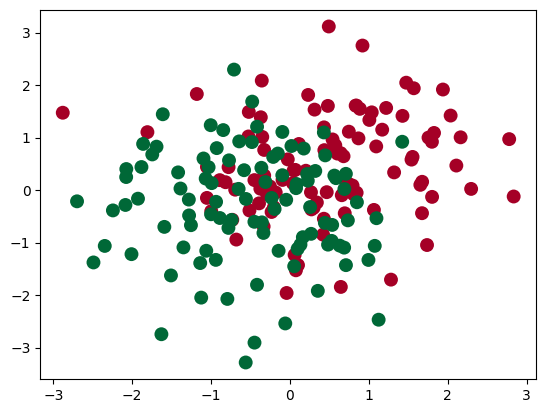

In [91]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np

n_data = torch.ones(100,2)
#print (n_data)

x0 = torch.normal(0.5*n_data,1)
y0 = torch.zeros(100)
x1 = torch.normal(-0.5*n_data,1)
y1 = torch.ones(100)

x = torch.cat((x0,x1),0).type(torch.FloatTensor)
y = torch.cat((y0,y1),).type(torch.LongTensor)

plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()


In [92]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        self.prediction = torch.nn.Linear(n_hidden,n_output)
        
    def forward(self,x):
        x = self.hidden(x)
        x = self.prediction(x)
        return x
    
net =Net(2,100,2)
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=100, bias=True)
  (prediction): Linear(in_features=100, out_features=2, bias=True)
)


In [93]:
opterator = torch.optim.SGD(net.parameters(),lr = 0.02)
loss_fun = torch.nn.CrossEntropyLoss()

for i in range(100):
    prediction = net(x)
    loss = loss_fun(prediction,x)
    opterator.zero_grad()
    loss.backward()
    opterator.step()
    
    # 接着上面来
    if t % 2 == 0:
        plt.cla()
        display.clear_output(wait=True)
        # 过了一道 softmax 的激励函数后的最大概率才是预测值
        prediction = torch.max(F.softmax(out), 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

AttributeError: module 'torch._subclasses' has no attribute 'functional_tensor'

In [94]:
fruits = ['apple', 'banana', 'cherry', 'date']

for index, fruit in enumerate(fruits, start=1):
    print(f"Index {index}: {fruit}")


Index 1: apple
Index 2: banana
Index 3: cherry
Index 4: date


In [95]:
import torch
import torch.utils.data as Data
torch.manual_seed(1)    # reproducible

BATCH_SIZE = 5     # 批训练的数据个数

x = torch.linspace(1, 10, 10)       # x data (torch tensor)
y = torch.linspace(10, 1, 10)       # y data (torch tensor)

# 先转换成 torch 能识别的 Dataset
torch_dataset = Data.TensorDataset(x, y)

# 把 dataset 放入 DataLoader
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
    num_workers=3,              # 多线程来读数据
)

for epoch in range(3):   # 训练所有!整套!数据 3 次
    for step, (batch_x, batch_y) in enumerate(loader):  # 每一步 loader 释放一小批数据用来学习
        # 假设这里就是你训练的地方...

        # 打出来一些数据
        print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',
              batch_x.numpy(), '| batch y: ', batch_y.numpy())

 

Epoch:  0 | Step:  0 | batch x:  [5. 3. 1. 7. 9.] | batch y:  [ 6.  8. 10.  4.  2.]
Epoch:  0 | Step:  1 | batch x:  [ 8. 10.  2.  6.  4.] | batch y:  [3. 1. 9. 5. 7.]
Epoch:  1 | Step:  0 | batch x:  [5. 9. 2. 6. 1.] | batch y:  [ 6.  2.  9.  5. 10.]
Epoch:  1 | Step:  1 | batch x:  [ 3.  4.  7. 10.  8.] | batch y:  [8. 7. 4. 1. 3.]
Epoch:  2 | Step:  0 | batch x:  [6. 9. 4. 8. 7.] | batch y:  [5. 2. 7. 3. 4.]
Epoch:  2 | Step:  1 | batch x:  [10.  3.  2.  1.  5.] | batch y:  [ 1.  8.  9. 10.  6.]


In [96]:
"""
View more, visit my tutorial page: https://mofanpy.com/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
torch: 0.4
torchvision
matplotlib
"""
# library
# standard library
import os

# third-party library
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from IPython import display
import time

time_start=time.time()

# torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 50
LR = 0.001              # learning rate
DOWNLOAD_MNIST = False


# Mnist digits dataset
if not(os.path.exists('./mnist/')) or not os.listdir('./mnist/'):
    # not mnist dir or mnist is empyt dir
    DOWNLOAD_MNIST = True

train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,
)

# plot one example
print(train_data.train_data.size())                 # (60000, 28, 28)
print(train_data.train_labels.size())               # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

# pick 2000 samples to speed up testing
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=32,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after Conv2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (16, 14, 14)
            nn.Conv2d(32, 64, 5, 1, 2),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2),                # output shape (32, 7, 7)
        )
        self.out = nn.Linear(64 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization


cnn = CNN()
print(cnn)  # net architecture

optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

# following function (plot_with_labels) is for visualization, can be ignored if not interested
from matplotlib import cm
try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SK = False; print('Please install sklearn for layer visualization')
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer'); plt.show(); plt.pause(0.01)
    time_end=time.time()
    print('time cost',time_end-time_start,'s')     
    print(torch.get_num_threads())
    
plt.ion()
# training and testing
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 50 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)
            if HAS_SK:
                # Visualization of trained flatten layer (T-SNE)
                tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
                plot_only = 500
                low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
                labels = test_y.numpy()[:plot_only]
                plot_with_labels(low_dim_embs, labels)
                 
                

plt.ioff()        


# print 10 predictions from test data
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

AttributeError: module 'torch._subclasses' has no attribute 'functional_tensor'

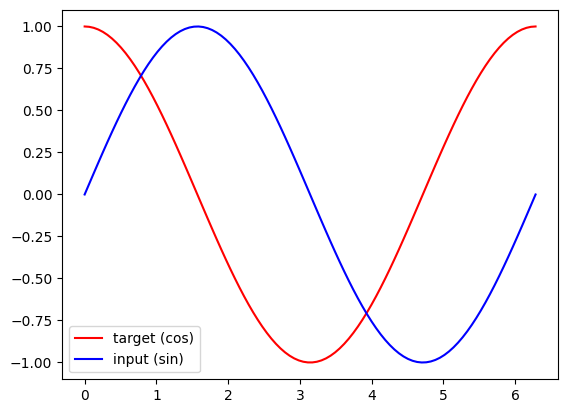

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


AttributeError: module 'torch._subclasses' has no attribute 'functional_tensor'

In [97]:
"""
View more, visit my tutorial page: https://mofanpy.com/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
torch: 0.4
matplotlib
numpy
"""
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from IPython import display
import time
time_start=time.time()
# torch.manual_seed(1)    # reproducible

# Hyper Parameters
TIME_STEP = 10      # rnn time step
INPUT_SIZE = 1      # rnn input size
LR = 0.02           # learning rate

# show data
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)  # float32 for converting torch FloatTensor
x_np = np.sin(steps)
y_np = np.cos(steps)
plt.plot(steps, y_np, 'r-', label='target (cos)')
plt.plot(steps, x_np, 'b-', label='input (sin)')
plt.legend(loc='best')
plt.show()


class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=32,     # rnn hidden unit
            num_layers=1,       # number of rnn layer
            batch_first=True,   # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )
        self.out = nn.Linear(32, 1)

    def forward(self, x, h_state):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, hidden_size)
        r_out, h_state = self.rnn(x, h_state)

        outs = []    # save all predictions
        for time_step in range(r_out.size(1)):    # calculate output for each time step
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state

        # instead, for simplicity, you can replace above codes by follows
        # r_out = r_out.view(-1, 32)
        # outs = self.out(r_out)
        # outs = outs.view(-1, TIME_STEP, 1)
        # return outs, h_state
        
        # or even simpler, since nn.Linear can accept inputs of any dimension 
        # and returns outputs with same dimension except for the last
        # outs = self.out(r_out)
        # return outs

rnn = RNN()
print(rnn)

optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.MSELoss()

h_state = None      # for initial hidden state

plt.figure(1, figsize=(12, 5))
plt.ion()           # continuously plot

for step in range(100):
    start, end = step * np.pi, (step+1)*np.pi   # time range
    # use sin predicts cos
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32, endpoint=False)  # float32 for converting torch FloatTensor
    x_np = np.sin(steps)
    y_np = np.cos(steps)

    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])    # shape (batch, time_step, input_size)
    y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])

    prediction, h_state = rnn(x, h_state)   # rnn output
    # !! next step is important !!
    h_state = h_state.data        # repack the hidden state, break the connection from last iteration

    loss = loss_func(prediction, y)         # calculate loss
    optimizer.zero_grad()                   # clear gradients for this training step
    loss.backward()                         # backpropagation, compute gradients
    optimizer.step()                        # apply gradients

    # plotting
    display.clear_output(wait=True)
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw(); plt.pause(0.05)

plt.ioff()
plt.show()
time_end=time.time()
print('time cost',time_end-time_start,'s')
print(x.size(),y.size())
print(torch.get_num_threads())

In [ ]:
"""
View more, visit my tutorial page: https://mofanpy.com/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
torch: 0.4
matplotlib
numpy
"""
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np


# torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 10
BATCH_SIZE = 64
LR = 0.005         # learning rate
DOWNLOAD_MNIST = False
N_TEST_IMG = 5

# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,                        # download it if you don't have it
)

# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[2].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[2])
plt.show()

# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)


class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3),   # compress to 3 features which can be visualized in plt
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),       # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


autoencoder = AutoEncoder()

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

# initialize figure
f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
plt.ion()   # continuously plot

# original data (first row) for viewing
view_data = train_data.train_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray'); a[0][i].set_xticks(()); a[0][i].set_yticks(())

for epoch in range(EPOCH):
    for step, (x, b_label) in enumerate(train_loader):
        b_x = x.view(-1, 28*28)   # batch x, shape (batch, 28*28)
        b_y = x.view(-1, 28*28)   # batch y, shape (batch, 28*28)

        encoded, decoded = autoencoder(b_x)

        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                    # apply gradients

        if step % 100 == 0:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy())

            # plotting decoded image (second row)
            _, decoded_data = autoencoder(view_data)
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.draw(); plt.pause(0.05)

plt.ioff()
plt.show()

# visualize in 3D plot
view_data = train_data.train_data[:200].view(-1, 28*28).type(torch.FloatTensor)/255.
encoded_data, _ = autoencoder(view_data)
fig = plt.figure(2); ax = Axes3D(fig)
X, Y, Z = encoded_data.data[:, 0].numpy(), encoded_data.data[:, 1].numpy(), encoded_data.data[:, 2].numpy()
values = train_data.train_labels[:200].numpy()
for x, y, z, s in zip(X, Y, Z, values):
    c = cm.rainbow(int(255*s/9)); ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim(X.min(), X.max()); ax.set_ylim(Y.min(), Y.max()); ax.set_zlim(Z.min(), Z.max())
plt.show()

In [98]:
import gym
from RL_brain import DeepQNetwork

env = gym.make('CartPole-v0')   # 定义使用 gym 库中的那一个环境
env = env.unwrapped # 不做这个会有很多限制

print(env.action_space) # 查看这个环境中可用的 action 有多少个
print(env.observation_space)    # 查看这个环境中可用的 state 的 observation 有多少个
print(env.observation_space.high)   # 查看 observation 最高取值
print(env.observation_space.low)    # 查看 observation 最低取值


ModuleNotFoundError: No module named 'gym'

In [99]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sentences)
print(embeddings)
print(embeddings)

ModuleNotFoundError: No module named 'sentence_transformers'

In [100]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for
sentences = ['This is an example sentence', 'Each sentence is converted']

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

# Normalize embeddings
sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

print("Sentence embeddings:")
print(sentence_embeddings)


ModuleNotFoundError: No module named 'transformers'

In [101]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('roberta-large-nli-stsb-mean-tokens')

ModuleNotFoundError: No module named 'sentence_transformers'

In [102]:
sentences = ['Lack of saneness',
        'Absence of sanity',
        'A man is eating food.',
        'A man is eating a piece of bread.',
        'The girl is carrying a baby.',
        'A man is riding a horse.',
        'A woman is playing violin.',
        'Two men pushed carts through the woods.',
        'A man is riding a white horse on an enclosed ground.',
        'A monkey is playing drums.',
        'A cheetah is running behind its prey.']
sentence_embeddings = model.encode(sentences)

for sentence, embedding in zip(sentences, sentence_embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

NameError: name 'model' is not defined

In [103]:
query = 'Nobody has sane thoughts'  #  A query sentence uses for searching semantic similarity score.
queries = [query]
query_embeddings = model.encode(queries)

NameError: name 'model' is not defined

In [104]:
import scipy

print("Semantic Search Results")
number_top_matches = 3
for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], sentence_embeddings, "cosine")[0]
    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])
    print("Query:", query)
    print("\nTop {} most similar sentences in corpus:".format(number_top_matches))

    for idx, distance in results[0:number_top_matches]:
        print(sentences[idx].strip(), "(Cosine Score: %.4f)" % (1-distance))

Semantic Search Results


NameError: name 'query_embeddings' is not defined

In [105]:
from copy import deepcopy
from random import randint

def shuffle(lst):
    temp_lst = deepcopy(lst)
    m = len(temp_lst)
    while (m):
        m -= 1
        i = randint(0, m)
        temp_lst[m], temp_lst[i] = temp_lst[i], temp_lst[m]
    return temp_lst

In [106]:
import xlrd
f = xlrd.open_workbook('Ko2Cn.xlsx').sheet_by_name('Xbench QA')
Ko_list = f.col_values(0) #　所有的中文句子
Cn_list = f.col_values(1) #　所有的韩语句子

shuffle_Cn_list = shuffle(Cn_list) # 所有的中文句子打乱排序
shuffle_Ko_list = shuffle(Ko_list) #　所有的韩语句子打乱排序

ModuleNotFoundError: No module named 'xlrd'

In [107]:
# File: llm.py
from langchain.llms import CTransformers

# Local CTransformers wrapper for Llama-2-7B-Chat
llm = CTransformers(model='models/llama-2-7b-chat.ggmlv3.q8_0.bin', # Location of downloaded GGML model
                    model_type='llama', # Model type Llama
                    config={'max_new_tokens': 256,
                            'temperature': 0.01})


ModuleNotFoundError: No module named 'langchain'

In [108]:
# File: utils.py
from langchain import PromptTemplate
from langchain.chains import RetrievalQA
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS

# Wrap prompt template in a PromptTemplate object
def set_qa_prompt():
    prompt = PromptTemplate(template=qa_template,
                            input_variables=['context', 'question'])
    return prompt


# Build RetrievalQA object
def build_retrieval_qa(llm, prompt, vectordb):
    dbqa = RetrievalQA.from_chain_type(llm=llm,
                                       chain_type='stuff',
                                       retriever=vectordb.as_retriever(search_kwargs={'k':2}),
                                       return_source_documents=True,
                                       chain_type_kwargs={'prompt': prompt})
    return dbqa


# Instantiate QA object
def setup_dbqa():
    embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2",
                                       model_kwargs={'device': 'cpu'})
    vectordb = FAISS.load_local('vectorstore/db_faiss', embeddings)
    qa_prompt = set_qa_prompt()
    dbqa = build_retrieval_qa(llm, qa_prompt, vectordb)

    return dbqa

ModuleNotFoundError: No module named 'langchain'

In [109]:
# File: main.py
import argparse
import timeit

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument('input', type=str)
    args = parser.parse_args()
    start = timeit.default_timer() # Start timer

    # Setup QA object
    dbqa = setup_dbqa()
    
    # Parse input from argparse into QA object
    response = dbqa({'query': args.input})
    end = timeit.default_timer() # End timer

    # Print document QA response
    print(f'\nAnswer: {response["result"]}')
    print('='*50) # Formatting separator

    # Process source documents for better display
    source_docs = response['source_documents']
    for i, doc in enumerate(source_docs):
        print(f'\nSource Document {i+1}\n')
        print(f'Source Text: {doc.page_content}')
        print(f'Document Name: {doc.metadata["source"]}')
        print(f'Page Number: {doc.metadata["page"]}\n')
        print('='* 50) # Formatting separator
        
    # Display time taken for CPU inference
    print(f"Time to retrieve response: {end - start}")

usage: ipykernel_launcher.py [-h] input
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

/root/miniconda3/envs/python39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [110]:
from ctransformers import AutoModelForCausalLM

llm = AutoModelForCausalLM.from_pretrained('/path/to/ggml-gpt-2.bin', model_type='gpt2')

print(llm('AI is going to'))


ModuleNotFoundError: No module named 'ctransformers'

In [111]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import math
import matplotlib.pyplot as plt
import numpy as np
import copy


In [112]:
embedding = nn.Embedding(10,3)
inputone = torch.LongTensor([[1.4,0,5.2,9.2],[2.4,2.4,5.3,9.2]])
print(embedding(inputone))

tensor([[[-0.1218,  0.3274, -1.0497],
         [-1.4705, -0.5454,  0.0985],
         [-1.3776,  0.8252, -0.4031],
         [ 1.2476,  1.0366, -1.4057]],

        [[ 0.2502,  1.7113,  2.1536],
         [ 0.2502,  1.7113,  2.1536],
         [-1.3776,  0.8252, -0.4031],
         [ 1.2476,  1.0366, -1.4057]]], grad_fn=<EmbeddingBackward0>)


/tmp/ipykernel_270556/2709177182.py:2: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  inputone = torch.LongTensor([[1.4,0,5.2,9.2],[2.4,2.4,5.3,9.2]])


In [113]:
embedding = nn.Embedding(10,3,padding_idx=0)
inputone = torch.LongTensor([[1.4,0,5.2,9.2],[2.4,2.4,5.3,9.2]])
print(embedding(inputone))

tensor([[[-1.4699,  0.3804, -0.0116],
         [ 0.0000,  0.0000,  0.0000],
         [ 1.4796, -0.2500,  0.4892],
         [-1.8834, -1.7516,  0.3095]],

        [[ 0.0693, -1.1396,  0.8325],
         [ 0.0693, -1.1396,  0.8325],
         [ 1.4796, -0.2500,  0.4892],
         [-1.8834, -1.7516,  0.3095]]], grad_fn=<EmbeddingBackward0>)


/tmp/ipykernel_270556/1911689051.py:2: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  inputone = torch.LongTensor([[1.4,0,5.2,9.2],[2.4,2.4,5.3,9.2]])


In [114]:
class Embeddings(nn.Module):
    def __init__(self,d_model,vocar):
        super(Embeddings,self).__init__()
        self.luc = nn.Embedding(vocar,d_model)
        self.d_model = d_model
        
    def forward(self,x):
        return self.luc(x)*math.sqrt(self.d_model)
        
        
        
        

In [115]:
vocab =1000 
modedem = 512
x =Variable(torch.LongTensor([[1.4,0,5.2,9.2],[2.4,2.4,5.3,9.2]]))

modes = Embeddings(vocab,modedem)
modes = modes(x)
print(modes)

tensor([[[ 15.7415, -39.3164,  50.7916,  ...,   3.9126, -46.1454,  -8.2823],
         [-34.8996,  59.3233,  37.8397,  ...,  19.8556, -46.5445, -32.5431],
         [  8.1156,  -2.4879,  10.5624,  ..., -66.1194, -15.6785,   7.9012],
         [ 38.1558,  -4.4846,  -1.3562,  ...,  -9.6679, -27.8175,  29.6419]],

        [[ 38.6331,  15.4790,  -7.1036,  ..., -14.1829,  24.0695,  -5.6766],
         [ 38.6331,  15.4790,  -7.1036,  ..., -14.1829,  24.0695,  -5.6766],
         [  8.1156,  -2.4879,  10.5624,  ..., -66.1194, -15.6785,   7.9012],
         [ 38.1558,  -4.4846,  -1.3562,  ...,  -9.6679, -27.8175,  29.6419]]],
       grad_fn=<MulBackward0>)


/tmp/ipykernel_270556/1730002604.py:3: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  x =Variable(torch.LongTensor([[1.4,0,5.2,9.2],[2.4,2.4,5.3,9.2]]))


In [116]:
class Embedding(nn.Module):
    def __init__(self,d_modle,vocab):
        super(Embedding,self).__init__()
        self.lut = nn.Embedding(vocab,d_modle)
        self.d_modle = d_modle
    def forward(self,x):
        return self.lut(x)*math.sqrt(self.d_modle)
    
    

In [117]:
demi = 512
vocab = 1000
x = Variable(torch.LongTensor([[1.4,0,5.2,9.2],[2.4,2.4,5.3,9.2]]))

md = nn.Embedding(vocab,demi)
sd = md(x)
print(sd)


tensor([[[-0.4879,  0.7472, -1.1997,  ...,  0.3408, -0.5812,  0.6933],
         [ 0.0241,  0.3131, -0.4914,  ...,  1.1138, -0.0026,  0.4727],
         [-0.4141,  0.6720, -0.6174,  ..., -1.0341,  0.6352, -0.9336],
         [ 0.1662, -1.0009,  0.7922,  ...,  0.3526, -0.1321,  0.0987]],

        [[-2.1572,  0.2398, -1.3426,  ...,  0.3488, -2.1380, -0.7307],
         [-2.1572,  0.2398, -1.3426,  ...,  0.3488, -2.1380, -0.7307],
         [-0.4141,  0.6720, -0.6174,  ..., -1.0341,  0.6352, -0.9336],
         [ 0.1662, -1.0009,  0.7922,  ...,  0.3526, -0.1321,  0.0987]]],
       grad_fn=<EmbeddingBackward0>)


/tmp/ipykernel_270556/911744683.py:3: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  x = Variable(torch.LongTensor([[1.4,0,5.2,9.2],[2.4,2.4,5.3,9.2]]))


In [118]:
class PositionEmbeeding(nn.Module):
    def __init__(self,dims,dropout,maxlen=5000):
        super(PositionEmbeeding,self).__init__()
        self.dropout = nn.Dropout(p = dropout)
        pe = torch.zeros(maxlen,dims)
        position =torch.arange(0,maxlen).unsqueeze(1)
        
        divterm = torch.exp(torch.arange(0,dims,2)*-(math.log(10000.0)/dims))
        pe[:,0::2] = torch.sin(position*divterm)
        pe[:,1::2] = torch.cos(position*divterm)
        
        
        pe = pe.unsqueeze(0)
        
        self.register_buffer('pe',pe)
        
    def forward(self,x):
        x = x + Variable(self.pe[:,x.size(1)],requires_grad = False)
        return self.dropout(x)

        
        
        
        

In [119]:
dims = 512
dropout = 0.1
maxlen = 100

x = sd
pe = PositionEmbeeding(dims,dropout,maxlen)
pe_re = pe(x)
print(pe_re)
print(pe_re.shape)

tensor([[[-1.3830e+00,  1.0396e-01, -2.0632e+00,  ...,  1.4898e+00,
          -0.0000e+00,  1.8814e+00],
         [-8.1408e-01, -3.7837e-01, -1.2762e+00,  ...,  2.3487e+00,
          -2.3932e-03,  1.6363e+00],
         [-1.3010e+00,  2.0446e-02, -1.4162e+00,  ..., -3.7910e-02,
           7.0628e-01,  7.3801e-02],
         [-6.5627e-01, -1.8384e+00,  1.5000e-01,  ...,  0.0000e+00,
          -0.0000e+00,  0.0000e+00]],

        [[-0.0000e+00, -4.5979e-01, -2.2220e+00,  ...,  1.4987e+00,
          -2.3751e+00,  2.9918e-01],
         [-3.2378e+00, -4.5979e-01, -2.2220e+00,  ...,  1.4987e+00,
          -2.3751e+00,  2.9918e-01],
         [-1.3010e+00,  2.0446e-02, -1.4162e+00,  ..., -3.7910e-02,
           7.0628e-01,  7.3801e-02],
         [-6.5627e-01, -0.0000e+00,  1.5000e-01,  ...,  1.5029e+00,
          -1.4629e-01,  1.2208e+00]]], grad_fn=<MulBackward0>)
torch.Size([2, 4, 512])


In [120]:
print(np.triu([[33,333,334,2,3,4,2,3],[33,333,334,2,3,4,2,3],[33,333,334,2,3,4,2,3],[33,333,334,2,3,4,2,3]], k= -1))

[[ 33 333 334   2   3   4   2   3]
 [ 33 333 334   2   3   4   2   3]
 [  0 333 334   2   3   4   2   3]
 [  0   0 334   2   3   4   2   3]]


In [121]:
def subsquence_mask(size):
    attn_shape = (1,size,size)
    
    subsquence_mask =np.triu(np.ones(attn_shape),k = 1).astype('uint8')
    
    return torch.from_numpy(1-subsquence_mask)

size = 5
sm = subsquence_mask(size)

print(sm)

tensor([[[1, 0, 0, 0, 0],
         [1, 1, 0, 0, 0],
         [1, 1, 1, 0, 0],
         [1, 1, 1, 1, 0],
         [1, 1, 1, 1, 1]]], dtype=torch.uint8)


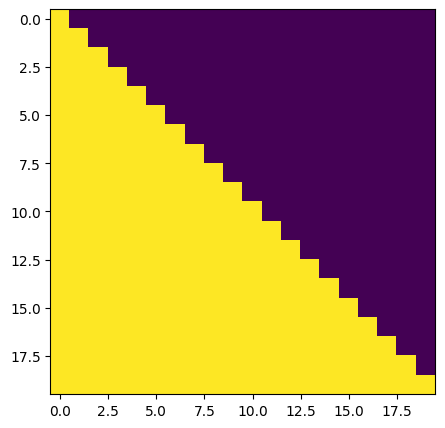

In [122]:
plt.figure(figsize=(5,5))
plt.imshow(subsquence_mask(20)[0])

In [123]:
import pandas as pd
import numpy as np

In [124]:
path = '../../data/fzdata/ExportSample.csv'
nuclear = pd.read_csv(path)

/tmp/ipykernel_270556/1100652774.py:2: DtypeWarning: Columns (6,12,18,35,36,41,42,44,48,50) have mixed types. Specify dtype option on import or set low_memory=False.
  nuclear = pd.read_csv(path)


In [125]:
nuclear.head()

,MARIS sample ID,Sample type,Laboratory,Latitude (decimal),Longitude (decimal),Station ID,Data provider's sample ID,MARIS Profile ID,MARIS Transect ID,Sampling depth (m),...,Counting method,MARIS reference ID,Reference/Citation,Zotero URL,Reference note,Sample note,Measurement note,Activity Corrected,Uncertanity Corrected,Unit Corrected
0,67809,Seawater,NOT AVAILABLE,-55.50,118.583333,NaN,13739,NaN,NaN,0.0,...,NaN,99,"Aoyama, M., Hirose, K., 2004. HAM 2008 - Histo...",https://www.zotero.org/groups/2432820/maris/it...,NaN,Author: Yasuo Miyake et al.. Unknown latitude ...,NaN,NaN,NaN,NaN
1,64065,Seawater,NOT AVAILABLE,-28.35,105.016667,CRP14,9903,NaN,NaN,0.0,...,NaN,99,"Aoyama, M., Hirose, K., 2004. HAM 2008 - Histo...",https://www.zotero.org/groups/2432820/maris/it...,NaN,Author: R. Delfanti et. al. Unknown latitude ...,NaN,NaN,NaN,NaN
2,69552,Seawater,NOT AVAILABLE,-31.25,34.100000,NaN,15495,NaN,NaN,0.0,...,NaN,99,"Aoyama, M., Hirose, K., 2004. HAM 2008 - Histo...",https://www.zotero.org/groups/2432820/maris/it...,NaN,Author: Nagaya et al.. Unknown latitude and lo...,NaN,NaN,NaN,NaN
3,69552,Seawater,NOT AVAILABLE,-31.25,34.100000,NaN,15495,NaN,NaN,0.0,...,NaN,99,"Aoyama, M., Hirose, K., 2004. HAM 2008 - Histo...",https://www.zotero.org/groups/2432820/maris/it...,NaN,Author: Nagaya et al.. Unknown latitude and lo...,NaN,NaN,NaN,NaN
4,64228,Seawater,NOT AVAILABLE,-34.75,105.800000,Indian Ocean,10071,NaN,NaN,0.0,...,NaN,99,"Aoyama, M., Hirose, K., 2004. HAM 2008 - Histo...",https://www.zotero.org/groups/2432820/maris/it...,NaN,Author: T.F.Folsom et al. Cruise: 39. Unknown ...,NaN,NaN,NaN,NaN


In [126]:
nuclear['Zotero URL']

0         https://www.zotero.org/groups/2432820/maris/it...
1         https://www.zotero.org/groups/2432820/maris/it...
2         https://www.zotero.org/groups/2432820/maris/it...
3         https://www.zotero.org/groups/2432820/maris/it...
4         https://www.zotero.org/groups/2432820/maris/it...
                                ...                        
413100    https://www.zotero.org/groups/2432820/maris/it...
413101    https://www.zotero.org/groups/2432820/maris/it...
413102    https://www.zotero.org/groups/2432820/maris/it...
413103    https://www.zotero.org/groups/2432820/maris/it...
413104    https://www.zotero.org/groups/2432820/maris/it...
Name: Zotero URL, Length: 413105, dtype: object